Python version: 3.10.13

In [5]:
import json
import os

import pprint as pp

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

CLIENT_ID = 'ee20c8ece36b49bab8fcaf52b50ec92b'
CLIENT_SECRET = '83bf998c26a542859ac199dc3457de5d'

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



In [14]:
def get_user_playlist(username, playlist_id, sp):
    offset=0
    playlist_songs = sp.user_playlist_tracks(username, playlist_id, limit=100, fields=None, offset=offset, market=None)['items']
    return playlist_songs


def create_dataframe(playlist_songs):
    
    playlist_df = pd.DataFrame()

    playlist_df['artist'] = np.array([song['track']["album"]["artists"][0]["name"] for song in playlist_songs])
    playlist_df['track_name'] = np.array([song['track']['name'] for song in playlist_songs])
    playlist_df['id'] = np.array([song['track']['id'] for song in playlist_songs])
    playlist_df['username'] = np.array([song['added_by']['id'] for song in playlist_songs])
    playlist_df['explicit'] = np.array([song['track']['explicit'] for song in playlist_songs])
    playlist_df['duration'] = np.array([song['track']['duration_ms'] for song in playlist_songs])
    
    
    audio_analysis = sp.audio_features(playlist_df['id'])    
    
    playlist_df['danceability'] = np.array([audio_info['danceability'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['tempo'] = np.array([audio_info['tempo'] for audio_info in audio_analysis])
    playlist_df['acousticness'] = np.array([audio_info['acousticness'] for audio_info in audio_analysis])
    playlist_df['energy'] = np.array([audio_info['energy'] for audio_info in audio_analysis])
    playlist_df['valence'] = np.array([audio_info['valence'] for audio_info in audio_analysis])
    playlist_df['liveness'] = np.array([audio_info['liveness'] for audio_info in audio_analysis])
    playlist_df['loudness'] = np.array([audio_info['loudness'] for audio_info in audio_analysis])
    playlist_df['speechiness'] = np.array([audio_info['speechiness'] for audio_info in audio_analysis])

    return playlist_df


https://open.spotify.com/playlist/37i9dQZF1F0sijgNaJdgit?si=szloeIpISk-Ulw1mTrtZTg&pi=u-SpKr1LYIR2yj

In [20]:
top2023_playlist = get_user_playlist('Harry..z','spotify:playlist:37i9dQZF1Fa4gqTGpQy99f',sp) 
top2023_df = create_dataframe(top2023_playlist)


top2023_df.head(10)


,artist,track_name,id,username,explicit,duration,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness
0,Origami Angel,Bossa Nova Corps,7o4BIVzqjcUnY8jGPD99sK,,False,172656,0.621,-5.890,179.994,0.064100,0.683,0.659,0.6630,0.1090
1,Thundercat,Them Changes,7CH99b2i1TXS5P8UUyWtnM,,False,188453,0.657,-8.600,81.657,0.540000,0.562,0.704,0.1010,0.0601
2,Origami Angel,"Thank You, New Jersey",46ikQYyoGkP6qwtRgikXQi,,False,159000,0.446,-3.999,175.033,0.003800,0.987,0.293,0.3400,0.2070
3,Kendrick Lamar,The Heart Part 5,5qbhVL3vB7HwWvb0042B7y,,True,332228,0.700,-8.128,97.405,0.183000,0.812,0.801,0.0756,0.2970
4,MGMT,She Works Out Too Much,3XOKU8CKSiQsuQHD5vhzo5,,False,278386,0.633,-6.208,147.970,0.005960,0.919,0.805,0.4300,0.0343
5,Delta Sleep,The Detail,1ExXxnndA4qMDA0SK8KnLM,,False,269173,0.477,-7.244,112.574,0.056000,0.637,0.545,0.0904,0.0385
6,Origami Angel,Noah Fence,38hxLBsdnpJn4Zhcnv3oky,,True,194812,0.561,-3.451,100.003,0.000567,0.963,0.504,0.0998,0.0814
7,Noname,Blaxploitation,7npEyXswEtXndjHXQs081U,,True,133056,0.890,-6.145,100.985,0.090000,0.829,0.866,0.2020,0.3500
8,Thundercat,Overseas,1iGOI54dl6Ps1kYlSpPZzg,,False,88453,0.849,-8.464,119.945,0.440000,0.604,0.714,0.7800,0.0338
9,Louis Cole,Dead Inside Shuffle,5zgcmMLv0HpraYWfsm5Plw,,True,200000,0.848,-5.896,133.072,0.140000,0.770,0.971,0.1030,0.0402


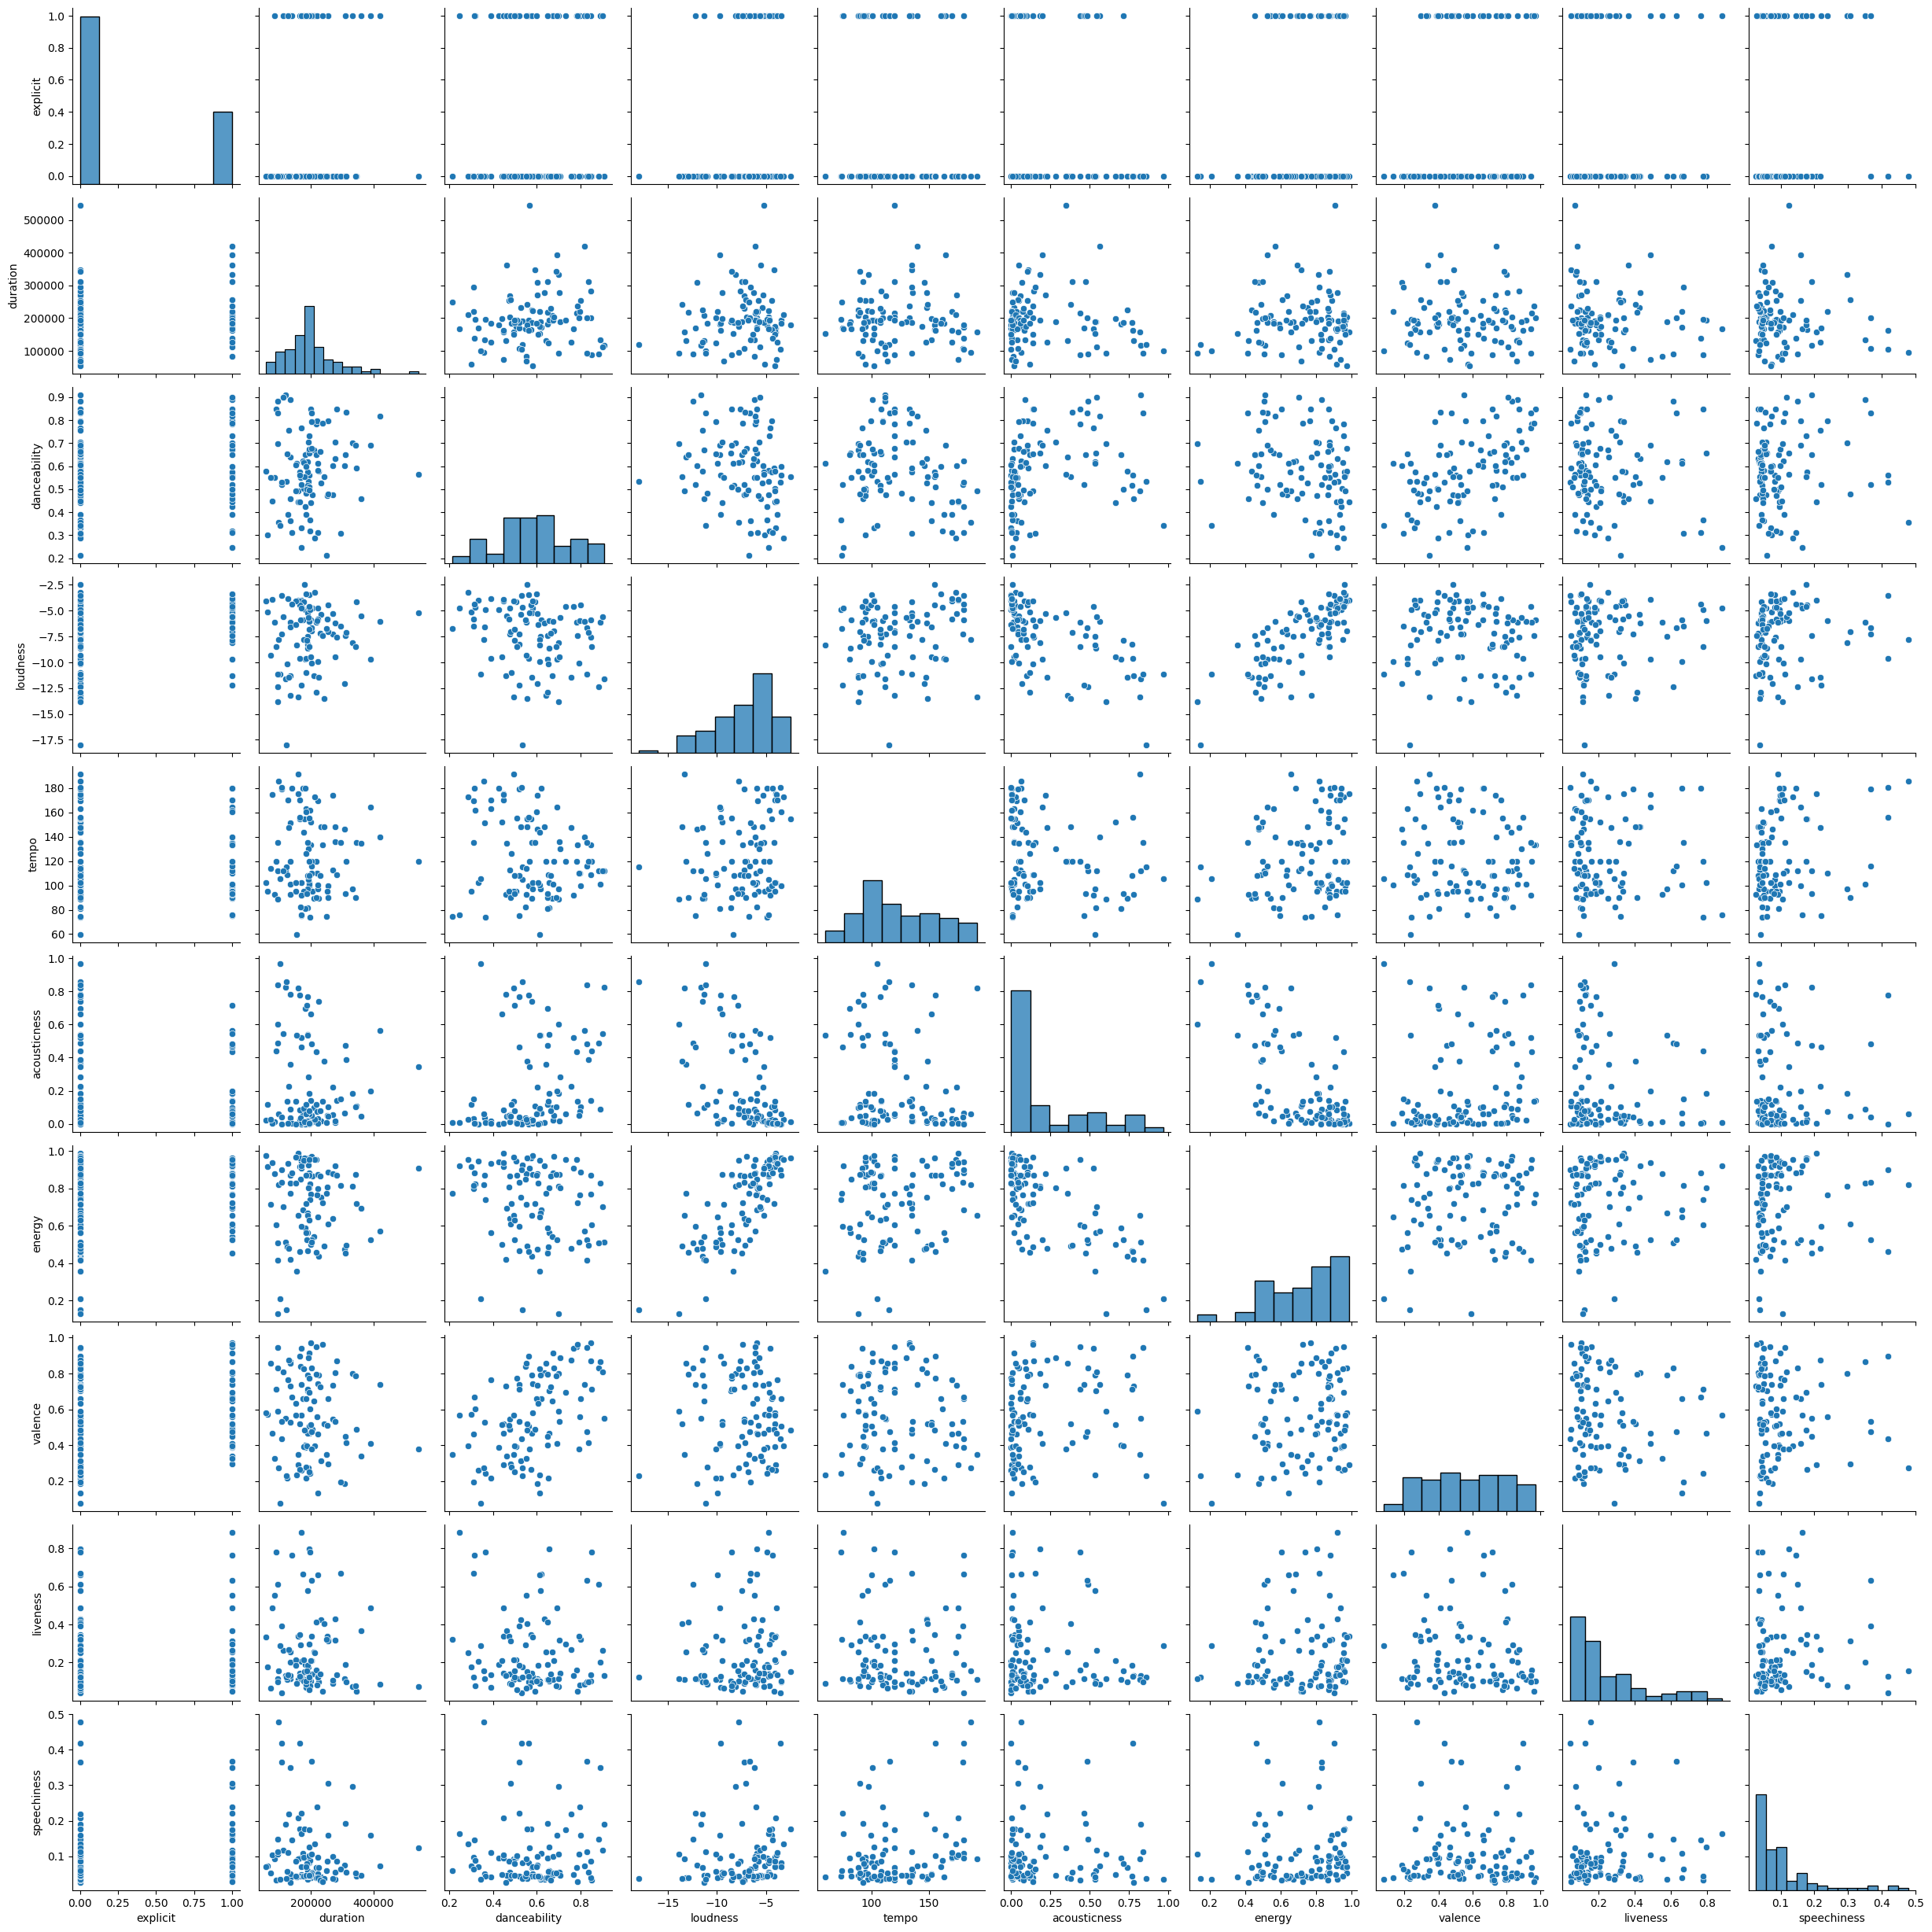

In [23]:
music_plot = sns.pairplot(top2023_df)
music_plot

In [28]:
df_non_standardised = top2023_df.drop(['username','artist','explicit','track_name','id'], axis=1)
display(df_non_standardised.head())

,duration,danceability,loudness,tempo,acousticness,energy,valence,liveness,speechiness
0,172656,0.621,-5.890,179.994,0.06410,0.683,0.659,0.6630,0.1090
1,188453,0.657,-8.600,81.657,0.54000,0.562,0.704,0.1010,0.0601
2,159000,0.446,-3.999,175.033,0.00380,0.987,0.293,0.3400,0.2070
3,332228,0.700,-8.128,97.405,0.18300,0.812,0.801,0.0756,0.2970
4,278386,0.633,-6.208,147.970,0.00596,0.919,0.805,0.4300,0.0343


NameError: name 'df' is not defined

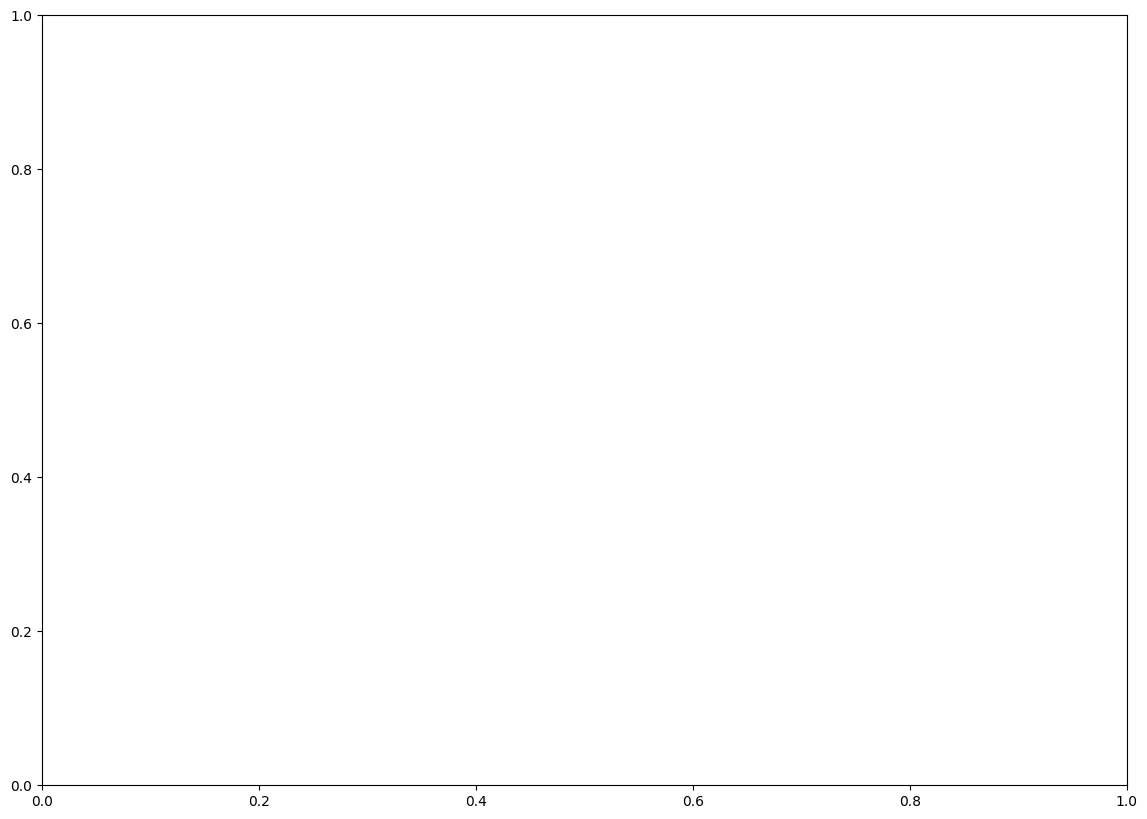

In [33]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(),annot = True,fmt = ".1f",ax = ax)
plt.show()